In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
data_1 = pd.read_csv("crop_production.csv")
data_2 = pd.read_excel("india_-_monthly_rainfall_data_-_1901_to_2002.xlsx")
data_3 = pd.read_excel("datafile (3).xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [34]:
data_1.reset_index(drop=True)
data_1.rename(columns = {"State_Name": "State","Crop_Year":"Year","District_Name":"District"},inplace=True)
data_1.drop(['District'],axis=1,inplace=True)
data_1.head()

,State,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.0,165.0


In [35]:
data_2.reset_index(drop=True)
data_2.dropna(inplace=True)
data_2['Year'] = data_2['Year'].astype(int)
data_2.drop(['vlookup'],axis=1,inplace=True)
data_2.drop(['District'],axis=1,inplace=True)
data_2.tail()

,State,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
55312,West Bengal,1998,3.676,16.042,15.435,43.497,189.031,101.695,275.914,316.537,262.286,256.652,15.486,0.000
55313,West Bengal,1999,7.867,2.932,2.066,3.020,151.115,214.111,380.077,375.183,232.015,85.839,7.591,0.255
55314,West Bengal,2000,11.294,10.908,10.686,27.669,110.618,264.845,185.798,297.535,280.883,22.048,0.568,0.423
55315,West Bengal,2001,1.866,4.048,21.805,36.436,152.242,164.361,311.196,271.373,165.015,124.258,2.798,0.000
55316,West Bengal,2002,14.939,3.758,12.410,54.591,80.993,189.604,276.109,285.924,215.591,108.733,17.757,0.000


In [36]:
data_3.reset_index(drop=True)
data_3.rename(columns = {"STATE": "State","Net Annual Ground Water Availability  (Ham)":"gnd_water_lvl"},inplace=True)
data_3 = data_3[['State','District','gnd_water_lvl']]
data_3.drop(['District'],axis=1,inplace=True)
data_3.head()

,State,gnd_water_lvl
0,ANDHRA PRADESH,111382.0
1,ANDHRA PRADESH,91598.0
2,ANDHRA PRADESH,89454.0
3,ANDHRA PRADESH,153953.0
4,ANDHRA PRADESH,154366.0


In [37]:
data_1['State'] = data_1['State'].apply(lambda x: x.lower().split()[0])
data_2['State'] = data_2['State'].apply(lambda x: x.lower().split()[0])
data_3['State'] = data_3['State'].apply(lambda x: x.lower().split()[0])

In [38]:
# data_1['District'] = data_1['District'].apply(lambda x: x.lower())
# data_2['District'] = data_2['District'].apply(lambda x: x.lower())
# data_3['District'] = data_3['District'].apply(lambda x: x.lower())

In [39]:
data = pd.merge(data_1,data_2,on=['State','Year'],how='inner')

In [41]:
data[data['Year']==2001]

,State,Year,Season,Crop,Area,Production,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
37789,andhra,2001,Kharif,Arhar/Tur,27942.0,7628.0,27.877,0.000,29.505,19.383,18.654,238.726,137.050,296.140,92.442,119.916,5.925,0.000
37790,andhra,2001,Kharif,Arhar/Tur,27942.0,7628.0,0.748,0.000,8.177,56.759,28.460,50.801,55.809,73.125,127.757,155.670,19.560,2.472
37791,andhra,2001,Kharif,Arhar/Tur,27942.0,7628.0,0.952,0.000,5.487,53.705,39.773,51.875,89.087,72.435,185.992,209.669,58.477,44.418
37792,andhra,2001,Kharif,Arhar/Tur,27942.0,7628.0,0.790,0.000,11.753,36.055,22.966,54.640,58.776,79.416,148.728,178.554,28.600,13.374
37793,andhra,2001,Kharif,Arhar/Tur,27942.0,7628.0,0.011,0.000,0.597,16.035,84.542,112.266,84.056,265.616,150.572,186.730,108.740,3.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182261,west,2001,Winter,Rice,290378.0,735730.0,0.584,7.151,54.737,37.617,165.122,283.245,191.569,240.687,127.433,150.473,13.361,0.000
2182262,west,2001,Winter,Rice,290378.0,735730.0,0.422,5.942,55.416,31.844,163.617,375.922,195.336,264.785,141.539,217.714,31.785,0.276
2182263,west,2001,Winter,Rice,290378.0,735730.0,0.865,3.735,52.550,23.926,63.026,168.369,205.502,282.682,80.766,110.240,9.863,0.000
2182264,west,2001,Winter,Rice,290378.0,735730.0,0.200,4.869,49.101,25.242,129.101,330.818,159.740,234.861,127.108,212.852,33.798,0.427


In [10]:
data = pd.merge(data,data_3,on=['State'])

MemoryError: Unable to allocate array with shape (97570076,) and data type int64

In [ ]:
data['Season'] = data['Season'].apply(lambda x: x.lower().strip())
data['Rain'] = 0

In [ ]:
for i in range(len(data)):
    if data['Season'][i] == 'kharif':
        data['Rain'][i] = data['Jul'][i] + data['Aug'][i] + data['Sep'][i] + data['Oct'][i] 
        
    elif data['Season'][i] == 'rabi' or data['Season'][i] == 'winter' :
        data['Rain'][i] = data['Oct'][i] + data['Nov'][i] + data['Dec'][i] + data['Jan'][i] + data['Feb'][i] + data['Mar'][i] 
    elif data['Season'][i] == 'summer':
        data['Rain'][i] = data['Mar'][i] + data['Apr'][i] + data['May'][i] + data['Jun'][i]
    elif data['Season'][i] == 'autumn':
        data['Rain'][i] = data['Sep'][i] + data['Oct'][i]
    else:
        data['Rain'][i] = data['Jan'][i] + data['Feb'][i] + data['Mar'][i] + data['Apr'][i] + data['May'][i] + data['Jun'][i] +  data['Jul'][i] + data['Aug'][i] + data['Sep'][i] + data['Oct'][i] + data['Nov'][i] + data['Dec'][i] 

In [ ]:
data.drop(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],axis=1,inplace=True)
data.dropna(inplace=True)

In [ ]:
sns.jointplot(x='gnd_water_lvl',y='Production',data=data)

In [ ]:
# data = data[data['State'] == 'andhra']

In [ ]:
a = data['State']
# b = data['District']
c = data['Crop']
d = data['Season']

In [ ]:
a = pd.get_dummies(a)
# b = pd.get_dummies(b)
c = pd.get_dummies(c)
d = pd.get_dummies(d)

In [ ]:
cols_a = a.columns.tolist()
cols_a = cols_a[1:]
a = a[cols_a]
# cols_b = b.columns.tolist()
# cols_b = cols_b[1:]
# b = b[cols_b]
cols_c = c.columns.tolist()
cols_c = cols_c[1:]
c = c[cols_c]
cols_d = c.columns.tolist()
cols_d = cols_d[1:]
c = c[cols_d]

In [ ]:
data.drop(['State','Crop','Season'],axis=1,inplace=True)
data.reset_index(drop=True,inplace=True)

In [ ]:
data = pd.concat([data,a,c,d],axis = 1)

In [ ]:
cols = data.columns.tolist()
cols = cols[:2]+ cols[3:] + [cols[2]]
data = data[cols]

In [ ]:
data

In [ ]:
from sklearn import preprocessing
x = data[['Rain']].values.astype(float)
min_max_scaler_s = preprocessing.MinMaxScaler()
x_season = min_max_scaler_s.fit_transform(x)
data['Rain'] = pd.DataFrame(x_season)

x = data[['Year']].values.astype(float)
min_max_scaler_y = preprocessing.MinMaxScaler()
x_year = min_max_scaler_y.fit_transform(x)
data['Year'] = pd.DataFrame(x_year)

x = data[['Area']].values.astype(float)
min_max_scaler_a = preprocessing.MinMaxScaler()
x_area = min_max_scaler_a.fit_transform(x)
data['Area'] = pd.DataFrame(x_area)

x = data[['Production']].values.astype(float)
min_max_scaler_p = preprocessing.MinMaxScaler()
x_prod = min_max_scaler_p.fit_transform(x)
data['Production'] = pd.DataFrame(x_prod)

x = data[['gnd_water_lvl']].values.astype(float)
min_max_scaler_g = preprocessing.MinMaxScaler()
x_gnd = min_max_scaler_g.fit_transform(x)
data['gnd_water_lvl'] = pd.DataFrame(x_gnd)

In [ ]:
data[['Year']]

In [ ]:
min_max_scaler_y.inverse_transform([[0.537]])

In [ ]:
data.dropna(inplace = True)

In [ ]:
# data = data[data['andhra']==1.0]

In [ ]:
data

In [ ]:
X = data[cols[:-1]]
y = data['Production']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
a = min_max_scaler_p.inverse_transform([y_test])
b = min_max_scaler_p.inverse_transform([predictions])

a = a.reshape(len(a[0]),)
b = b.reshape(len(b[0]),)
a.shape

In [ ]:
check = pd.DataFrame()
check['Test'] = a
b = b.astype(int)
check['Pred'] = b
check[check['Pred'] == 35688].count()

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

In [ ]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
check.iplot(kind='scatter',x='Test',y='Pred',mode='markers',size=10)

<Figure size 360x720 with 0 Axes>

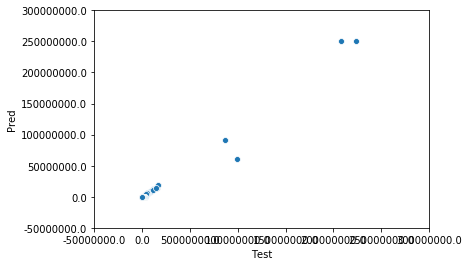

<Figure size 360x720 with 0 Axes>

In [94]:
# # plt.scatter(min_max_scaler_p.inverse_transform([y_test]),min_max_scaler_p.inverse_transform([predictions]))
# # plt.xlabel('Y Test')
# # plt.ylabel('Predicted Y')
# fig = sns.scatterplot(x='Test',y='Pred',data=check)
# plt.yticks(fig.get_yticks(), fig.get_yticks() )
# plt.xticks(fig.get_yticks(), fig.get_yticks() )
# plt.figure(figsize=(5,10))
